In [80]:
import cv2
import numpy
from PIL import Image

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **A specific key is taken to choose pixels for encoding and decoding**

In [82]:
key="53710246"

# **Function to convert data into Binary list**

In [83]:
def get_binary(data):

        # list of binary codes
        # of given data
        newd = []

        for i in data:
            newd.append(format(ord(i), '08b'))
        return newd

# **Encoding and Decoding functions for colored Image**

In [84]:
def getPix(pix, data):

    bin_data = get_binary(data)
    len_data = len(bin_data)
    img_data = iter(pix)

    new_key=key

    for i in range(len_data):

        new_key=new_key[1:]+new_key[:1]

        # Extracting 3 pixels at a time
        arr=[value for value in img_data.__next__()[:3] +
                                img_data.__next__()[:3] +
                                img_data.__next__()[:3]]

        # Pixel value should be made
        # odd for 1 and even for 0
        for j in range(0, 8):
            if (bin_data[i][j] == '0' and arr[ord(new_key[j])-48]% 2 != 0):
                arr[ord(new_key[j])-48] -= 1

            elif (bin_data[i][j] == '1' and arr[ord(new_key[j])-48] % 2 == 0):
                if(arr[ord(new_key[j])-48] != 0):
                    arr[ord(new_key[j])-48] -= 1
                else:
                    arr[ord(new_key[j])-48] += 1

        # Eighth pixel of every set tells
        # whether to stop or to read further.
        # 0 means keep reading; 1 means the
        # message is over.
        if (i == len_data - 1):
            if (arr[-1] % 2 == 0):
                if(arr[-1] != 0):
                    arr[-1] -= 1
                else:
                    arr[-1] += 1

        else:
            if (arr[-1] % 2 != 0):
                arr[-1] -= 1

        arr = tuple(arr)
        yield arr[0:3]
        yield arr[3:6]
        yield arr[6:9]

In [85]:
def encode(image, data):
    w = image.size[0]
    (x, y) = (0, 0)

    for pixel in getPix(image.getdata(), data):

        # Putting modified pixels in the new image
        image.putpixel((x, y), pixel)
        if (x == w - 1):
            x = 0
            y += 1
        else:
            x += 1

In [86]:
def decode(stego_img):
     
    data = ''
    imgdata = iter(stego_img.getdata())

    new_key=key

    while (True):

        new_key=new_key[1:]+new_key[:1]
        pixels = [value for value in imgdata.__next__()[:3] +
                                imgdata.__next__()[:3] +
                                imgdata.__next__()[:3]]

        # string of binary data
        binstr = ''

        for i in range(0,8):
            if (pixels[ord(new_key[i])-48] % 2 == 0):
                binstr += '0'
            else:
                binstr += '1'

        data += chr(int(binstr, 2))
        if (pixels[-1] % 2 != 0):
            return data

# **Encoding and Decoding functions for GreyScale Image**

In [87]:
def getPix2(pix, data):

    bin_data = get_binary(data)
    len_data = len(bin_data)

    new_key=key

    l=0


    for i in range(len_data):

        new_key=new_key[1:]+new_key[:1]

        # Extracting 9 pixels at a time
        arr=[]
        for k in range(0,9):
          arr.append(pix[l])
          l=l+1

        # Pixel value should be made
        # odd for 1 and even for 0
        for j in range(0, 8):
            if (bin_data[i][j] == '0' and arr[ord(new_key[j])-48]% 2 != 0):
                arr[ord(new_key[j])-48] -= 1

            elif (bin_data[i][j] == '1' and arr[ord(new_key[j])-48] % 2 == 0):
                if(arr[ord(new_key[j])-48] != 0):
                    arr[ord(new_key[j])-48] -= 1
                else:
                    arr[ord(new_key[j])-48] += 1
                # pix[j] -= 1

        # Eighth pixel of every set tells
        # whether to stop ot read further.
        # 0 means keep reading; 1 means the
        # message is over.
        if (i == len_data - 1):
            if (arr[-1] % 2 == 0):
                if(arr[-1] != 0):
                    arr[-1] -= 1
                else:
                    arr[-1] += 1

        else:
            if (arr[-1] % 2 != 0):
                arr[-1] -= 1

        arr = tuple(arr)
        yield arr[0]
        yield arr[1]
        yield arr[2]
        yield arr[3]
        yield arr[4]
        yield arr[5]
        yield arr[6]
        yield arr[7]
        yield arr[8]

In [88]:
def encode2(image,data):
    w = image.size[0]
    (x, y) = (0, 0)
    for pixel in getPix2(image.getdata(), data):
      # Putting modified pixels in the new image
      image.putpixel((x, y), pixel)
      if (x == w - 1):
        x = 0
        y += 1
      else:
        x += 1

In [89]:
def decode2(stego_img2):
     
    data = ''
    pix = stego_img2.getdata()

    new_key=key
    l=0

    while (True):

        new_key=new_key[1:]+new_key[:1]
        arr=[]
        for k in range(0,9):
          arr.append(pix[l])
          l=l+1

        # string of binary data
        binstr = ''

        for i in range(0,8):
            if (arr[ord(new_key[i])-48] % 2 == 0):
                binstr += '0'
            else:
                binstr += '1'

        data += chr(int(binstr, 2))
        if (arr[-1] % 2 != 0):
            return data

# **Giving user the choice to choosing Greyscale or Colored image for Enconding/Decoding**

In [90]:
img_type=0
while(img_type!=1 and img_type!=2):
  img_type=int(input("Enter 1 for GreyScale and 2 for RGB image encoding"))

Enter 1 for GreyScale and 2 for RGB image encoding4
Enter 1 for GreyScale and 2 for RGB image encoding2


In [91]:
data=input("Enter secret messsage: ")

Enter secret messsage: Hey, How are You?


In [92]:
if(img_type==1):
  cov_img2=Image.open("/content/drive/MyDrive/Cover_1.png")
  stego_img2=cov_img2.copy()
  encode2(stego_img2,data)
  ext_data=decode2(stego_img2)
  print(ext_data)
else:
  cov_img2=Image.open("/content/drive/MyDrive/Cover_2.png")
  stego_img2=cov_img2.copy()
  encode(stego_img2,data)
  ext_data=decode(stego_img2)
  print(ext_data)

Hey, How are You?


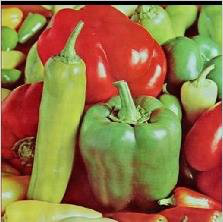

In [93]:
stego_img2

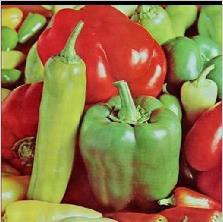

In [94]:
cov_img2